In [35]:
import torch
import numpy as np
import torch.optim as optim

t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]

t_c = torch.tensor(t_c).unsqueeze(1)
t_u = torch.tensor(t_u).unsqueeze(1)

n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

random_indexes = torch.randperm(n_samples)
t_c_train = t_c[random_indexes[:-n_val]]
t_c_val = t_c[random_indexes[-n_val:]]
t_u_train = t_u[random_indexes[:-n_val]]
t_u_val = t_u[random_indexes[-n_val:]]

t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val

In [45]:
import torch.nn as nn

linear_mode = nn.Linear(1,1) #num of input and output features, bias is considered by default
#linear_model(t_un_val)

#linear_model.weight, linear_model.bias
list(linear_model.parameters())

optimizer = optim.SGD(linear_model.parameters(), lr = 1e-2)

def training_loop(n_epochs, optimizer, loss_fn, model, 
                  t_u_train, t_c_train, t_u_val, t_c_val):
    for epoch in range(1 + n_epochs):
        t_p_train= model(t_u_train)
        loss_train = loss_fn(t_p_train, t_c_train)
        
        t_p_val = model(t_u_val)
        loss_val = loss_fn(t_p_val, t_c_val)
        
        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()
        
        if epoch == 1 or epoch % 1000 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():.4f}")

training_loop(
    n_epochs = 3000,
    optimizer = optimizer,
    model = linear_model, #pass already made linear model
    loss_fn = nn.MSELoss(), #pass meas square error loss function in nn
    t_u_train = t_un_train,
    t_u_val = t_un_val,
    t_c_train = t_c_train,
    t_c_val = t_c_val)

print()
print(list(linear_model.parameters()))

Epoch 0, Training loss 2.8539, Validation loss 3.9670
Epoch 1, Training loss 2.8539, Validation loss 3.9670
Epoch 1000, Training loss 2.8539, Validation loss 3.9670
Epoch 2000, Training loss 2.8539, Validation loss 3.9670
Epoch 3000, Training loss 2.8539, Validation loss 3.9670

[Parameter containing:
tensor([[5.4310]], requires_grad=True), Parameter containing:
tensor([-17.2885], requires_grad=True)]


In [140]:
seq_model = nn.Sequential(
                nn.Linear(1,13), #1 input features, 13 output feature, also 13 biases
                nn.Tanh(),
                nn.Linear(13,1)) #13 input features, 1 output feature, also 1 bias
#seq_model
#[param.shape for param in list(seq_model.parameters())] 
#layer0: 13 weights, 13 biases, layer2: 13 weights, 1 bias

#list(seq_model.parameters())

#[(name, param.shape) for name, param in seq_model.named_parameters()]

#naming layers
from collections import OrderedDict

seq_model_2 = nn.Sequential(OrderedDict([
                    ('hidden_linear', nn.Linear(1,8)),
                    ('hidden_activation', nn.Tanh()),
                    ('output_linear',nn.Linear(8,1))]))

#seq_model_2
#seq_model_2.hidden_linear.weight.shape

training_loop(n_epochs = 5000,
             optimizer = optim.SGD(seq_model.parameters(), lr = 1e-3),
             model = seq_model,
             loss_fn = nn.MSELoss(),
             t_u_train = t_un_train,
             t_u_val = t_un_val,
             t_c_train = t_c_train,
             t_c_val = t_c_val)

print()
print('validation model output: ', seq_model(t_un_val))
print('validation actual answers: ', seq_model(t_c_val))

Epoch 0, Training loss 214.7125, Validation loss 128.4924
Epoch 1, Training loss 208.3115, Validation loss 122.2592
Epoch 1000, Training loss 3.6125, Validation loss 4.6336
Epoch 2000, Training loss 1.9993, Validation loss 3.0742
Epoch 3000, Training loss 1.9031, Validation loss 2.1613
Epoch 4000, Training loss 1.7862, Validation loss 2.3568
Epoch 5000, Training loss 1.7547, Validation loss 2.3998

validation model output:  tensor([[ 8.1416],
        [16.0517]], grad_fn=<AddmmBackward>)
validation actual answers:  tensor([[27.5425],
        [33.4630]], grad_fn=<AddmmBackward>)


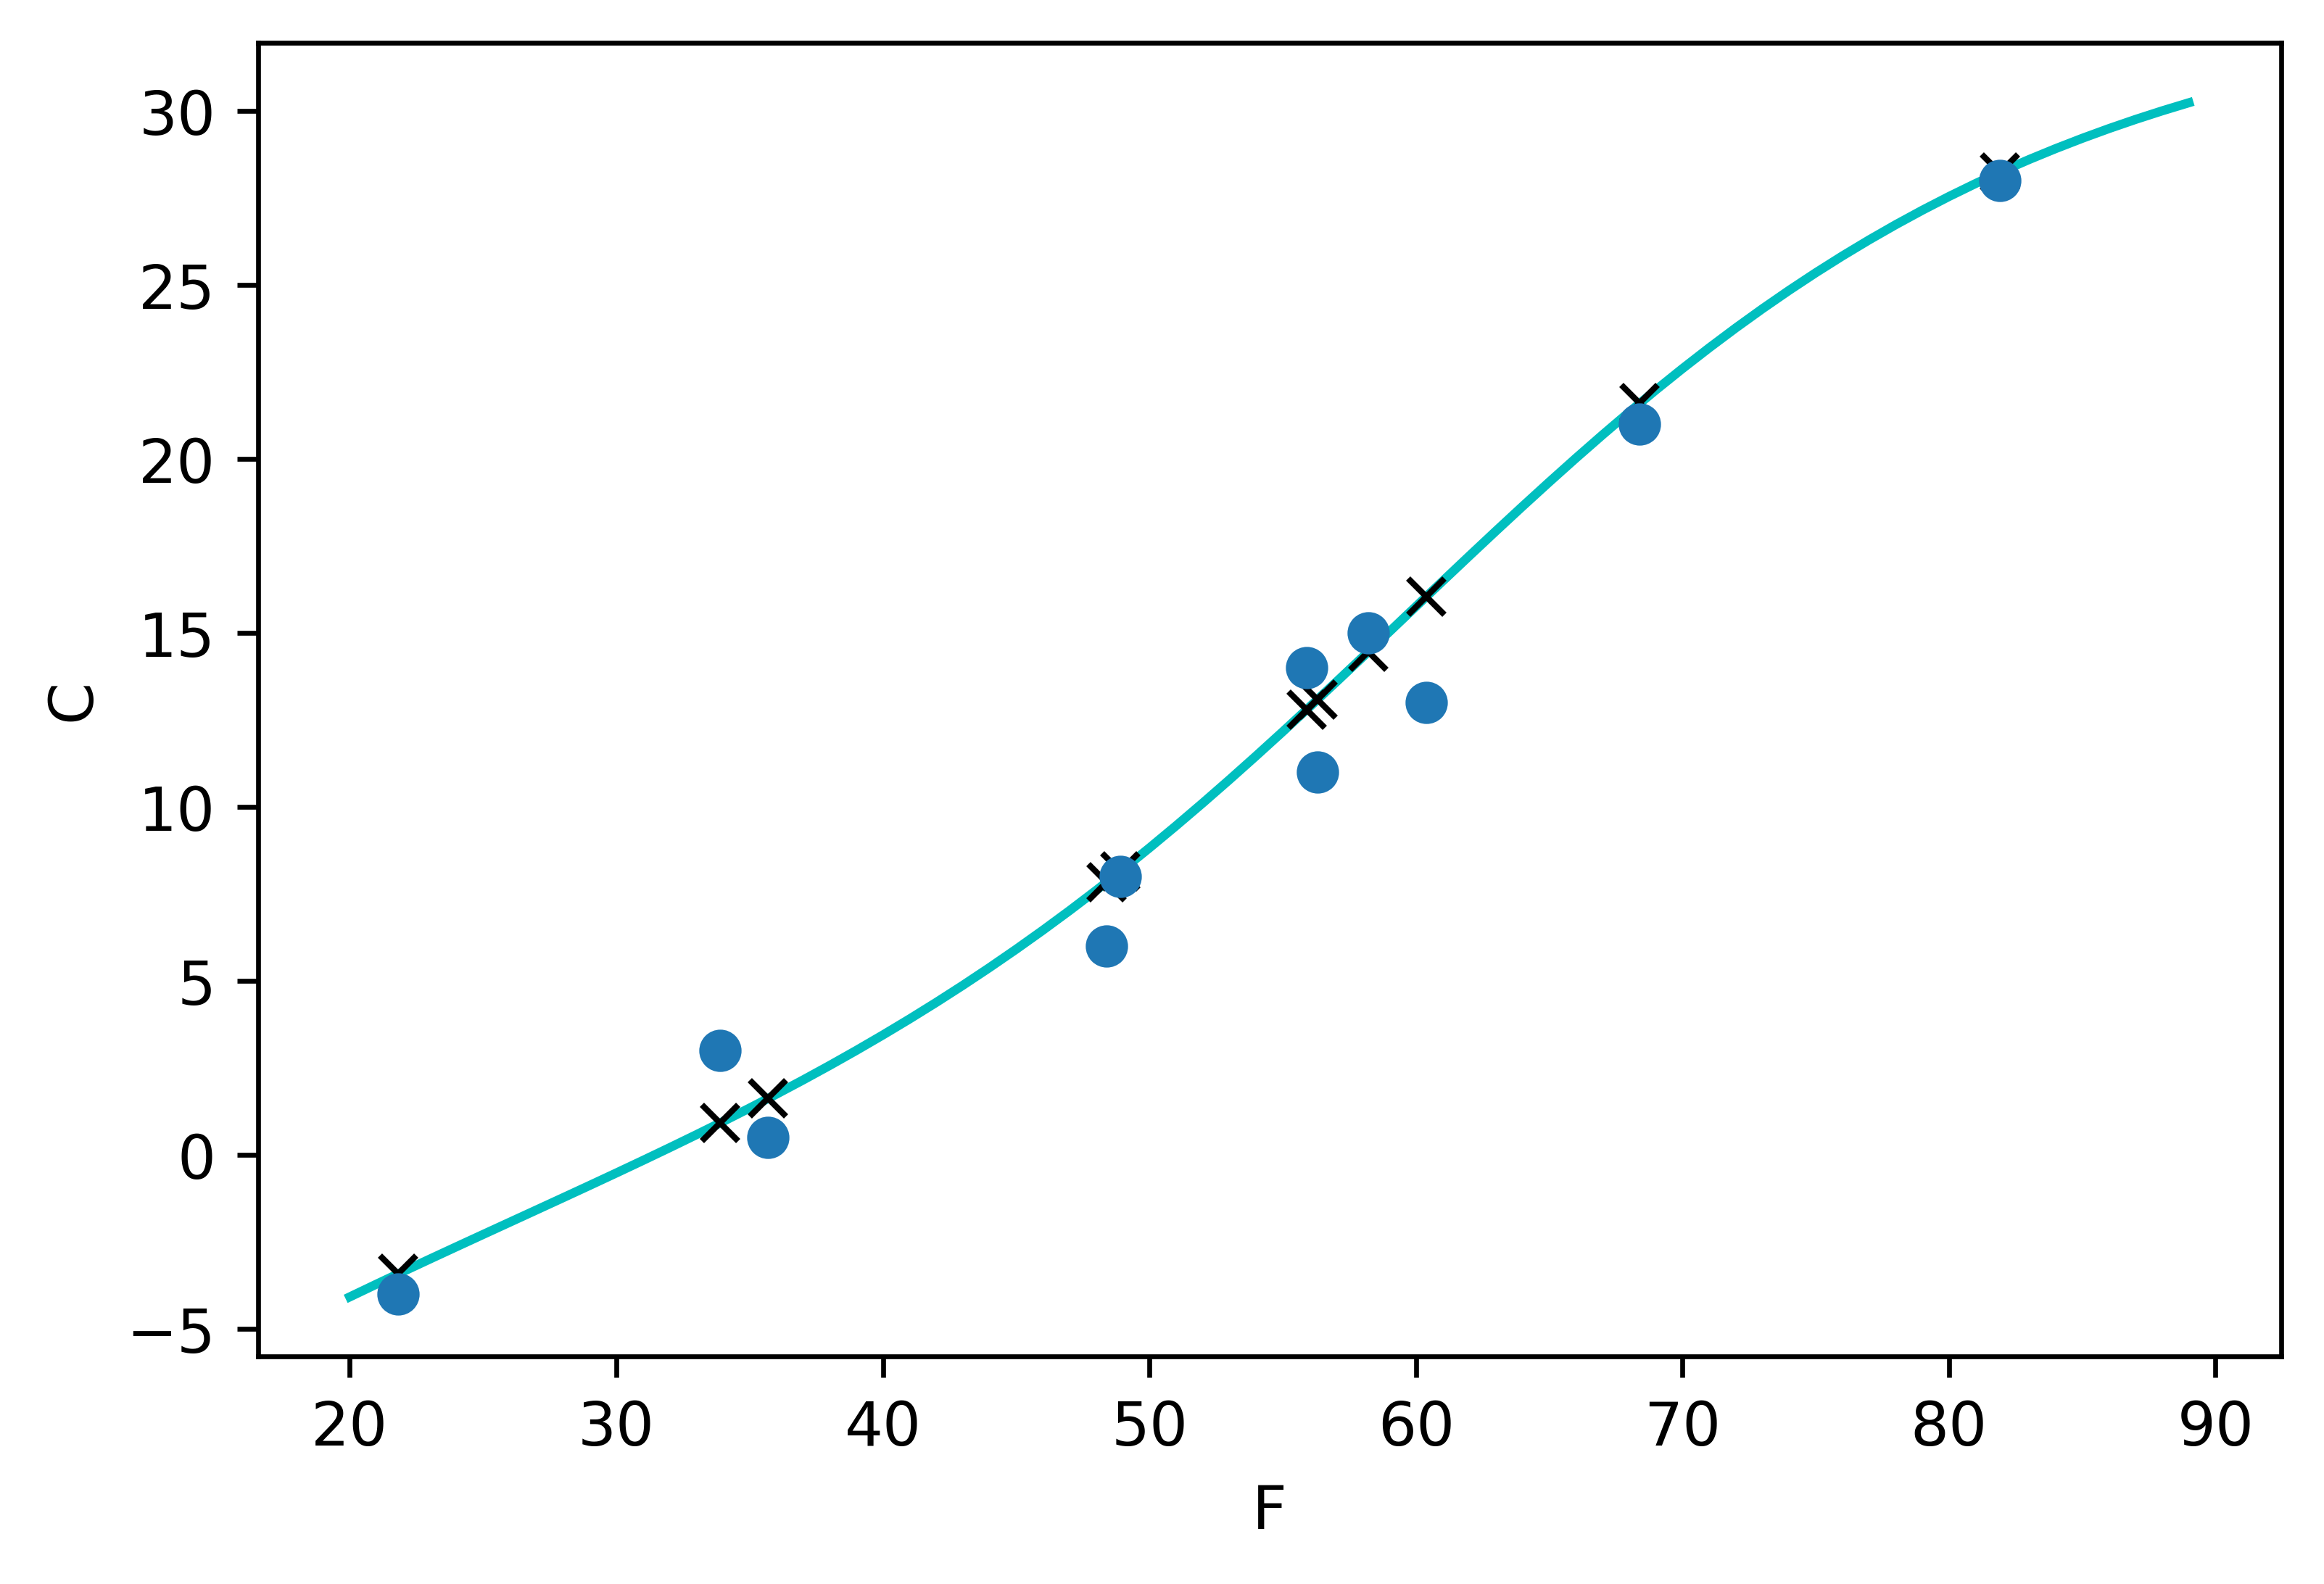

In [142]:
from matplotlib import pyplot as plt

t_range = torch.arange(20.,90.).unsqueeze(1)
#t_range
fig = plt.figure(dpi=600)
plt.xlabel("F")
plt.ylabel("C")
t_p = seq_model(0.1 * t_u)
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), t_p.detach().numpy(),'kx')
plt.plot(t_u.numpy(), t_c.numpy(), 'o')